In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
class_data = pd.read_pickle('all_data_processed_0817.pkl')
count_dic = {}
for c in list(class_data['label'].to_list()):
    if c in count_dic.keys():
        count_dic[c] += 1
    else:
        count_dic[c] = 1
sorted_dict_desc = dict(sorted(count_dic.items(), key=lambda item: item[1], reverse=True))
# print("按值降序排序后的字典：", sorted_dict_desc)
total = sum(sorted_dict_desc.values())
proportion_dict = {k: v / total for k, v in sorted_dict_desc.items()}
birth_data = pd.read_pickle('birth_date.pkl')
birth_date = {}
for idx, row in birth_data.iterrows():
    if not row['birth_time'][0].isdigit():
        pass
    else:
        birth_date[row['qid']] = row['birth_time'][:4]

new_dic = []

In [6]:
labels = class_data['label'].tolist()
from collections import Counter

c = Counter(labels).most_common()

In [8]:
x = [x[0] for x in c]

y = [x[1] for x in c]

In [30]:
x = ['career',
 'birth',
 'education',
 'movement',
 'death',
 'competition',
 'marriage',
 'performance',
 'assembly',
 'give birth',
 'settlement',
 'military',
 'start org',
 'creation',
 'meet',
 'exhibition',
 'justice',
 'attack',
 'campaign',
 'purch & sell',
 'other',
 'accident',
 'inj & ill',
 'divorce']

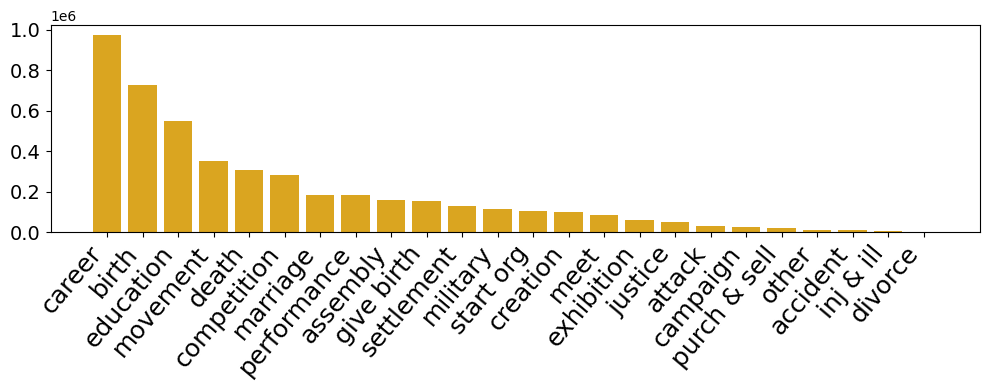

In [31]:
plt.figure(figsize=(10, 4))
plt.bar(x, y, color='goldenrod')
plt.xticks(rotation=50, ha='right', size=18)
plt.yticks(size = 14)
plt.tight_layout()
# plt.show()
plt.savefig('../../crop_dis.pdf')

In [2]:
# keep_class = ['competition']
# keep_class = ['education', 'die', 'birth', 'military', 'marry', 'competition', 'career', 'performance', 'assembly',  'divorce']
keep_class = ['military', 'competition']
# keep_class = ['education', 'die', 'birth', 'marry', 'competition', 'career', 'performance', 'assembly']
for index, row in class_data.iterrows():
    # print(f"Index: {index}")
    try:
        # birth_time = birth_date[row['wikidata_code']]
        event_time = int((int(row['time']) - 1700) / 5)
        # age = int((int(event_time) - int(birth_time)) / 10)
        if event_time < 0 or event_time > 60:
            continue
        event_class = row['label']
        if event_class not in keep_class:
            event_class = 'others'
        new_dic.append((row['name'], str(event_time), event_class))
    except:
        pass

In [3]:
new_dic_df = pd.DataFrame(new_dic, columns=['qid', 'event_time', 'label'])
new_dic_df.groupby('label').count()

,qid,event_time
label,,
competition,142279,142279
military,85344,85344
others,3398763,3398763


In [4]:
def get_variables_to_chart(year, keep_class):
    keep_class1 = keep_class + ['others']
    size = len(year)
    classes = []
    for i in keep_class1:
        classes.append([0] * size)
    # classes.append([0] * size)

    for i in range(size):
        temp = new_dic_df[new_dic_df['event_time'] == str(i)]
        temp = temp.groupby('label').count()

        head = temp.index.to_list()
        
        for idx, cls in enumerate(keep_class1):
            # print(idx, cls)
            if cls in head:
                classes[idx][i] = temp.loc[cls][1]
            else:
                classes[idx][i] = 0

    population_by_continent = {cls: classes[idx] for idx, cls in enumerate(keep_class1)}
    return population_by_continent


def get_variables_to_chart_percentage(year, keep_class):
    keep_class1 = keep_class + ['others']
    size = len(year)
    classes = []
    for i in keep_class1:
        classes.append([0] * size)
    # classes.append([0] * size)

    for i in range(size):
        temp = new_dic_df[new_dic_df['event_time'] == str(i)]
        temp = temp.groupby('label').count()

        head = temp.index.to_list()
        for idx, cls in enumerate(keep_class1):
            if cls in head:
                classes[idx][i] = temp.loc[cls][1]
            else:
                classes[idx][i] = 0

    all_class = np.array(classes)
    col_sums = all_class.sum(axis=0)
    percentage_array = all_class / col_sums 
    percentage_list = percentage_array.tolist()
    population_by_continent = {cls: percentage_list[idx] for idx, cls in enumerate(keep_class1)}
    
    return population_by_continent


In [5]:
year = ['[' + str(1700 + i * 5) + ',' + str(1700 + (i + 1) * 5) + ')' for i in range(60)]
population_by_continent = get_variables_to_chart_percentage(year, keep_class)

In [6]:
# len(population_by_continent['education'])
del population_by_continent['others']

In [7]:
# year = ['[' + str(1700 + i * 10) + ',' + str(1700 + (i + 1) * 10) + ')' for i in range(30)]
# population_by_continent = get_variables_to_chart_percentage(year, keep_class)

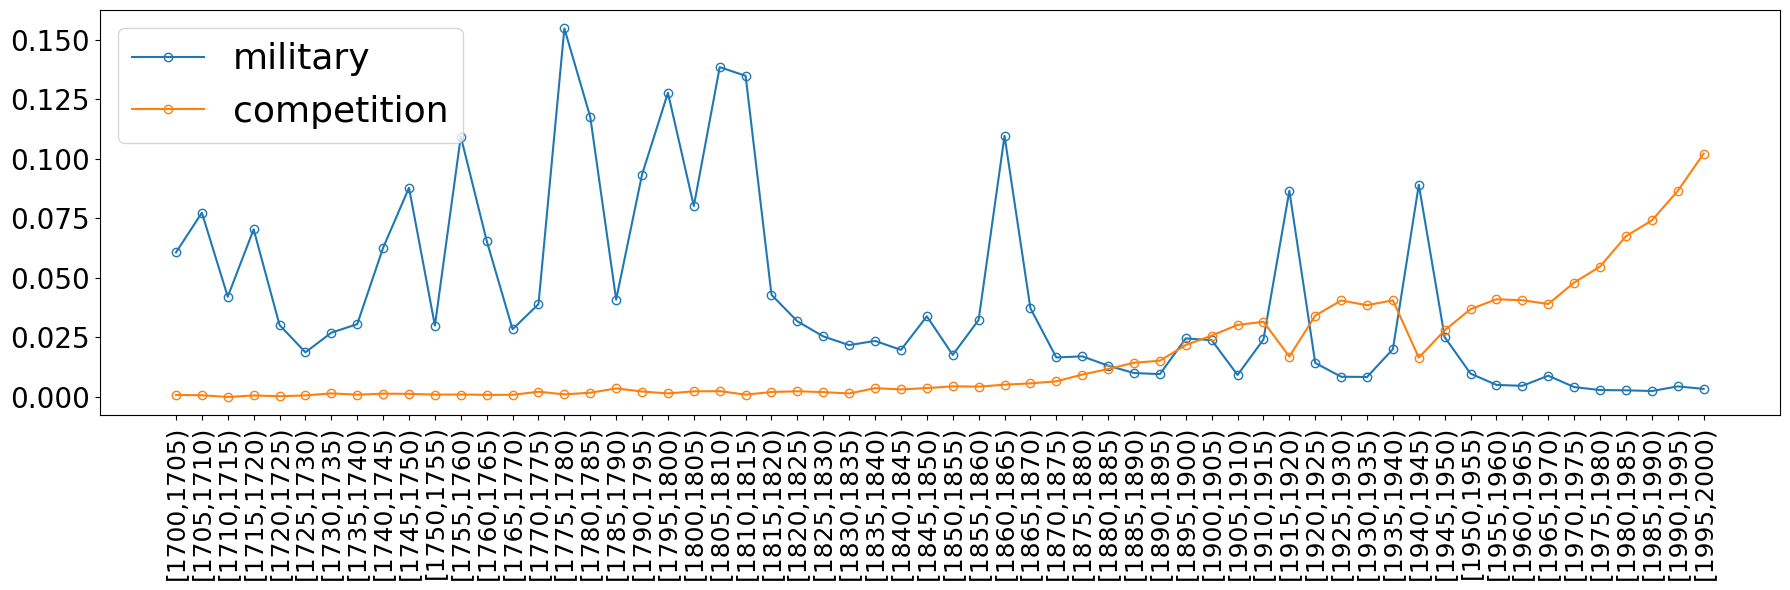

In [10]:
plt.figure(figsize=(18, 6))
for type in population_by_continent:
    plt.plot(year, population_by_continent[type], label=type, marker='o',markerfacecolor='none')
plt.legend(loc='upper left',prop={'size': 26})
plt.xticks(rotation=90, ha='center')
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=20)
plt.tight_layout()

plt.savefig('class_distribution.svg', format='svg')
plt.show()

In [12]:
population_by_continent['military']

[0.060672444994761404,
 0.07736908860300779,
 0.04209328782707622,
 0.07037096003821047,
 0.03021050940061064,
 0.018738797458041388,
 0.02699034981905911,
 0.030569105691056912,
 0.0626479186969233,
 0.08783872234585678,
 0.02997779422649889,
 0.1093516924842226,
 0.06556892131729442,
 0.028446823272871444,
 0.03897096281202241,
 0.15472660828794044,
 0.11758873686297838,
 0.040863426554439315,
 0.09337718809231799,
 0.12771603914413668,
 0.08016324885373104,
 0.13847367932411103,
 0.13483050847457628,
 0.042888652887835964,
 0.0317660069404721,
 0.02542814594192107,
 0.021768402154398563,
 0.02353858595194085,
 0.01977257525083612,
 0.03385804886676605,
 0.017669947356374456,
 0.03234725531627928,
 0.10962511907652651,
 0.03723171265878231,
 0.016597272623094846,
 0.0170580499718204,
 0.013165436094534912,
 0.010059191274275073,
 0.009600220483532635,
 0.02458471760797342,
 0.02385954962038696,
 0.009236453201970444,
 0.0241335749986269,
 0.08655771387837682,
 0.014298406352379367,
 

In [13]:
population_by_continent['competition']

[0.0008572244975711972,
 0.0007247689798876608,
 0.0,
 0.000636841267314122,
 0.0003213883978788366,
 0.0006517842594101353,
 0.0015078407720144752,
 0.000975609756097561,
 0.0013921759710427398,
 0.0013090718680455558,
 0.0009869232667160128,
 0.0010327022375215145,
 0.0008873989351212779,
 0.0008920606601248885,
 0.002207505518763797,
 0.0011032200234434254,
 0.001784651992861392,
 0.003597610643497149,
 0.0022856505742000223,
 0.0014927848731132857,
 0.0023681160880737644,
 0.0024603100919134715,
 0.0009745762711864407,
 0.002083163140266318,
 0.002402471113144949,
 0.0020476545048399106,
 0.0014747371120800204,
 0.0036968576709796672,
 0.0031839464882943143,
 0.0037395456957323697,
 0.004463263904783703,
 0.0043384435552758175,
 0.005155313147916394,
 0.005714171942818461,
 0.006570151648267695,
 0.00939319932368965,
 0.01173257813290179,
 0.014382149507847832,
 0.015219488294468007,
 0.021806100875868317,
 0.02578017246935382,
 0.03023524680808284,
 0.03158125995496238,
 0.0169614

In [15]:
import numpy as np
from scipy.stats import pearsonr

# 定义两个序列
x = np.array(population_by_continent['competition'])
y = np.array(population_by_continent['military'])

# 计算Pearson相关系数
corr, p = pearsonr(x, y)

print("Pearson相关系数:", corr)
print("置信度:", p)

Pearson相关系数: -0.5162077317189714
置信度: 2.4241036012273513e-05
